# Import des librairies 

In [258]:
import pickle
import os 
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time as t
from pylab import *
from matplotlib.figure import Figure

# Import de toutes les data dans une liste et transformation en Dataframe

## Import des data

In [259]:
Liste_Dict = []


num_fichier = 1 
while num_fichier <16:
    str_num_fichier = str(num_fichier)
    file = "./PPG_FieldStudy/S"+str_num_fichier+"/S"+str_num_fichier+".pkl"
    with open (file,"rb") as f:
        Data = pickle.load(f,encoding="latin-1")
        Liste_Dict.append(Data)
    msg = "Fichier : "+str_num_fichier+" - > Importé"
    print(msg)
    num_fichier = num_fichier+1

Fichier : 1 - > Importé
Fichier : 2 - > Importé
Fichier : 3 - > Importé
Fichier : 4 - > Importé
Fichier : 5 - > Importé
Fichier : 6 - > Importé
Fichier : 7 - > Importé
Fichier : 8 - > Importé
Fichier : 9 - > Importé
Fichier : 10 - > Importé
Fichier : 11 - > Importé
Fichier : 12 - > Importé
Fichier : 13 - > Importé
Fichier : 14 - > Importé
Fichier : 15 - > Importé


### Architecture des dict 

In [260]:
Liste_Dict[0].keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

## Transformation en Dataframe

In [261]:
 def dict_to_list(Data) :
    dfs  = []
    pbms = []
    oks  = []
    
    for k in Data.keys():
        try:
            df = pd.DataFrame(Data[k]) 
            dfs.append(df)
            oks.append(k)
        except Exception as e:
            pbms.append(k + str(e))
   
    print(f"clefs ok = {oks}")
        
    print(f"clefs avec un pbms = {pbms}")
    return dfs

### Traitement de label avec activity

In [262]:
Liste_liste = []

num_liste = 1

for Dict in Liste_Dict:
    str_num_liste = str(num_liste)
    print("Fichier : "+str_num_liste)
    Liste_liste.append(dict_to_list(Dict))
    num_liste = num_liste + 1 
   
    


Fichier : 1
clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']
Fichier : 2
clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']
Fichier : 3
clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']
Fichier : 4
clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']
Fichier : 5
clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame 

# Traitement des données en dataframe

### Traitement des données en signal 

### Il faut découper ce dataframe, pour cela on va traiter chest puis signal. Il faut savoir que toutes les valeurs ne sont pas utilisable ou utile dans ce Dataframe dont : 
    - Pour chest : BVP/EDA/EMG/TEMP/Temp
    - pour wrist : ECG/EMG/Resp/Temp/TEMP

In [263]:
for l in Liste_liste:
    taille_activity = len(l[3])
    print("taille ACC : "+str(len(l[1]["chest"]["ACC"])))
    ration_ACC = len(l[1]["chest"]["ACC"])/taille_activity
    print("taille ECG : "+str(len(l[1]["chest"]["ECG"])))
    ration_ECG = len(l[1]["chest"]["ECG"])/taille_activity
    print("taille Resp : "+str(len(l[1]["chest"]["Resp"])))
    ration_Resp = len(l[1]["chest"]["Resp"])/taille_activity

    print("Ration taille :\n - ACC/activity = "+str(ration_ACC)+"\n - ECG/activity = "+str(ration_ECG)+"\n - Resp/activity = "+str(ration_Resp))

taille ACC : 6448400
taille ECG : 6448400
taille Resp : 6448400
Ration taille :
 - ACC/activity = 175.0
 - ECG/activity = 175.0
 - Resp/activity = 175.0
taille ACC : 5743500
taille ECG : 5743500
taille Resp : 5743500
Ration taille :
 - ACC/activity = 175.0
 - ECG/activity = 175.0
 - Resp/activity = 175.0
taille ACC : 6118700
taille ECG : 6118700
taille Resp : 6118700
Ration taille :
 - ACC/activity = 175.0
 - ECG/activity = 175.0
 - Resp/activity = 175.0
taille ACC : 6405000
taille ECG : 6405000
taille Resp : 6405000
Ration taille :
 - ACC/activity = 175.0
 - ECG/activity = 175.0
 - Resp/activity = 175.0
taille ACC : 6513500
taille ECG : 6513500
taille Resp : 6513500
Ration taille :
 - ACC/activity = 175.0
 - ECG/activity = 175.0
 - Resp/activity = 175.0
taille ACC : 3675000
taille ECG : 3675000
taille Resp : 3675000
Ration taille :
 - ACC/activity = 175.0
 - ECG/activity = 175.0
 - Resp/activity = 175.0
taille ACC : 6540100
taille ECG : 6540100
taille Resp : 6540100
Ration taille :
 -

##### On voit bien le rapport de 175, On devra prendre 1 valeur sur 175 pour échelonner chest avec activity 

In [264]:

for l in Liste_liste:
    taille_activity = len(l[3])
    print("taille ACC : "+str(len(l[1]["wrist"]["ACC"])))
    ration_ACC = len(l[1]["wrist"]["ACC"])/taille_activity
    print("taille BVP : "+str(len(l[1]["wrist"]["BVP"])))
    ration_BVP = len(l[1]["wrist"]["BVP"])/taille_activity
    print("taille EDA : "+str(len(l[1]["wrist"]["EDA"])))
    ration_EDA = len(l[1]["wrist"]["EDA"])/taille_activity
       
    print("Ration taille :\n - ACC/activity = "+str(ration_ACC)+"\n - BVP/activity = "+str(ration_BVP)+"\n - EDA/activity = "+str(ration_EDA))

taille ACC : 294784
taille BVP : 589568
taille EDA : 36848
Ration taille :
 - ACC/activity = 8.0
 - BVP/activity = 16.0
 - EDA/activity = 1.0
taille ACC : 262560
taille BVP : 525120
taille EDA : 32820
Ration taille :
 - ACC/activity = 8.0
 - BVP/activity = 16.0
 - EDA/activity = 1.0
taille ACC : 279712
taille BVP : 559424
taille EDA : 34964
Ration taille :
 - ACC/activity = 8.0
 - BVP/activity = 16.0
 - EDA/activity = 1.0
taille ACC : 292800
taille BVP : 585600
taille EDA : 36600
Ration taille :
 - ACC/activity = 8.0
 - BVP/activity = 16.0
 - EDA/activity = 1.0
taille ACC : 297760
taille BVP : 595520
taille EDA : 37220
Ration taille :
 - ACC/activity = 8.0
 - BVP/activity = 16.0
 - EDA/activity = 1.0
taille ACC : 168000
taille BVP : 336000
taille EDA : 21000
Ration taille :
 - ACC/activity = 8.0
 - BVP/activity = 16.0
 - EDA/activity = 1.0
taille ACC : 298976
taille BVP : 597952
taille EDA : 37372
Ration taille :
 - ACC/activity = 8.0
 - BVP/activity = 16.0
 - EDA/activity = 1.0
taille

#### Pour échelonner wrist il faudra prendre 1 valeur sur 8 pour ACC et une valeur sur 16 pour BVP. EDA est déjà à l'échelle 

In [265]:
Liste_liste[0][1]["chest"][0]

array([[ 0.85640001, -0.06779999, -0.36559999],
       [ 0.8556    , -0.06900001, -0.3646    ],
       [ 0.852     , -0.07020003, -0.3642    ],
       ...,
       [ 0.88759995, -0.1038    , -0.27920002],
       [ 0.88619995, -0.10159999, -0.27819997],
       [ 0.88680005, -0.10140002, -0.27380002]])

#### split des données de signal :  chest :

In [266]:
def split_chest(liste,num):
    index_echel = np.arange(0,len(liste[1]["chest"]["ACC"]),175)    
    taille_activity = len(liste[3])
    Tamp_ACC = []
    Tamp_ECG = []
    Tamp_Resp = []
    
    test = [liste[1]["chest"][0][index-1] for index in index_echel]
    tamp_df = pd.DataFrame(test)
    
    Tamp_ACC_X = tamp_df.pop(0)
    Tamp_ACC_Y = tamp_df.pop(1)
    Tamp_ACC_Z = tamp_df.pop(2)
    
    Tamp_ECG = [liste[1]["chest"][2][index-1] for index in index_echel]
    Tamp_Resp = [liste[1]["chest"][5][index-1] for index in index_echel]
  
    Df_ECG = pd.DataFrame(Tamp_ECG)
    Df_Resp = pd.DataFrame(Tamp_Resp)
    
    print(Tamp_ACC_X.shape[0])
    print(Tamp_ACC_Y.shape[0])
    print(Tamp_ACC_Z.shape[0])
   
    if(Tamp_ACC_X.shape[0] == taille_activity&Tamp_ACC_Y.shape[0] == taille_activity &Tamp_ACC_Z.shape[0] == taille_activity& Df_ECG.shape[0] == taille_activity&Df_Resp.shape[0] == taille_activity):
        print("Signal: chest de la liste : "+str(num+1)+" traité correctement")
    
    return Tamp_ACC_X,Tamp_ACC_Y,Tamp_ACC_Z,Df_ECG,Df_Resp
    

In [267]:
num = 0
list_df_chest_ech = []

List_tamp = []
for liste in Liste_liste:
    Tamp_ACC_X,Tamp_ACC_Y,Tamp_ACC_Z,Tamp_ECG,Tamp_Resp = split_chest(liste,num)
    List_tamp = []
    List_tamp.append(Tamp_ACC_X)
    List_tamp.append(Tamp_ACC_Y)
    List_tamp.append(Tamp_ACC_Z)
    List_tamp.append(Tamp_ECG)
    List_tamp.append(Tamp_Resp)
    list_df_chest_ech.append(List_tamp)
    num = num+1
print(len(list_df_chest_ech))



36848
36848
36848
Signal: chest de la liste : 1 traité correctement
32820
32820
32820
Signal: chest de la liste : 2 traité correctement
34964
34964
34964
Signal: chest de la liste : 3 traité correctement
36600
36600
36600
Signal: chest de la liste : 4 traité correctement
37220
37220
37220
Signal: chest de la liste : 5 traité correctement
21000
21000
21000
Signal: chest de la liste : 6 traité correctement
37372
37372
37372
Signal: chest de la liste : 7 traité correctement
32320
32320
32320
Signal: chest de la liste : 8 traité correctement
34240
34240
34240
Signal: chest de la liste : 9 traité correctement
42592
42592
42592
Signal: chest de la liste : 10 traité correctement
36192
36192
36192
Signal: chest de la liste : 11 traité correctement
31656
31656
31656
Signal: chest de la liste : 12 traité correctement
36544
36544
36544
Signal: chest de la liste : 13 traité correctement
35832
35832
35832
Signal: chest de la liste : 14 traité correctement
31756
31756
31756
Signal: chest de la liste

#### Split de signal : wrist maintenant : 

##### Il faut prendre 1 valeur sur 8 pour ACC et 1 valeur sur 16 pour BVP,EDA est déjà à l'échelle

In [268]:
def split_wrist(liste,num):
    index_echel_acc = np.arange(0,len(liste[1]["wrist"]["ACC"]),8)
    print(len(index_echel_acc))
    index_echel_bvp = np.arange(0,len(liste[1]["wrist"]["BVP"]),16)
    print(len(index_echel_bvp))
    taille_activity = len(liste[3])
    Tamp_ACC = []
    Tamp_BVP = []
    
    
    
    Tamp_ACC = [liste[1]["wrist"][0][index-1] for index in index_echel_acc]
    tamp_df = pd.DataFrame(Tamp_ACC)
    Tamp_ACC_X = tamp_df.pop(0)
    Tamp_ACC_Y = tamp_df.pop(1)
    Tamp_ACC_Z = tamp_df.pop(2)    
    Tamp_BVP = [liste[1]["wrist"][1][index-1] for index in index_echel_bvp] 

    
    print(Tamp_ACC_X.shape[0])
    print(Tamp_ACC_Y.shape[0])
    print(Tamp_ACC_Z.shape[0])
    
    Df_BVP = pd.DataFrame(Tamp_BVP)
    Df_EDA = pd.DataFrame(liste[1]["wrist"]["EDA"])
   
    if(Tamp_ACC_X.shape[0] == taille_activity &Tamp_ACC_Y.shape[0] == taille_activity &Tamp_ACC_Z.shape[0] == taille_activity & Df_BVP.shape[0] == taille_activity&Df_EDA.shape[0] == taille_activity):
        print("Signal: wrist de la liste : "+str(num+1)+" traité correctement")
    
    return Tamp_ACC_X,Tamp_ACC_Y,Tamp_ACC_Z,Df_BVP,Df_EDA 
    

In [269]:
num = 0
list_df_wrist_ech = []

List_tamp = []
for liste in Liste_liste:
    Tamp_ACC_X,Tamp_ACC_Y,Tamp_ACC_Z,Tamp_BVP,Tamp_EDA = split_wrist(liste,num)
    List_tamp = []
    List_tamp.append(Tamp_ACC_X)
    List_tamp.append(Tamp_ACC_Y)
    List_tamp.append(Tamp_ACC_Z)
    List_tamp.append(Tamp_BVP)
    List_tamp.append(Tamp_EDA)
    list_df_wrist_ech.append(List_tamp)
    num = num+1
print(len(list_df_wrist_ech))

36848
36848
36848
36848
36848
Signal: wrist de la liste : 1 traité correctement
32820
32820
32820
32820
32820
Signal: wrist de la liste : 2 traité correctement
34964
34964
34964
34964
34964
Signal: wrist de la liste : 3 traité correctement
36600
36600
36600
36600
36600
Signal: wrist de la liste : 4 traité correctement
37220
37220
37220
37220
37220
Signal: wrist de la liste : 5 traité correctement
21000
21000
21000
21000
21000
Signal: wrist de la liste : 6 traité correctement
37372
37372
37372
37372
37372
Signal: wrist de la liste : 7 traité correctement
32320
32320
32320
32320
32320
Signal: wrist de la liste : 8 traité correctement
34240
34240
34240
34240
34240
Signal: wrist de la liste : 9 traité correctement
42592
42592
42592
42592
42592
Signal: wrist de la liste : 10 traité correctement
36192
36192
36192
36192
36192
Signal: wrist de la liste : 11 traité correctement
31656
31656
31656
31656
31656
Signal: wrist de la liste : 12 traité correctement
36544
36544
36544
36544
36544
Signal:

In [270]:
list_df_wrist_ech[14][0]

0       -0.218750
1       -0.640625
2       -0.937500
3       -1.281250
4       -1.000000
5       -0.906250
6       -0.859375
7       -0.968750
8       -1.046875
9       -0.953125
10      -1.015625
11      -1.046875
12      -1.015625
13      -1.000000
14      -1.000000
15      -1.046875
16      -1.015625
17      -1.015625
18      -1.000000
19      -1.062500
20      -0.953125
21      -1.109375
22      -1.015625
23      -0.984375
24      -1.031250
25      -0.937500
26      -0.937500
27      -0.921875
28      -0.906250
29      -0.890625
           ...   
31726   -1.062500
31727   -1.000000
31728   -1.421875
31729   -0.390625
31730   -0.093750
31731   -0.281250
31732   -0.265625
31733   -0.234375
31734   -0.250000
31735   -0.250000
31736   -0.234375
31737   -0.250000
31738   -0.250000
31739   -0.234375
31740   -0.250000
31741   -0.218750
31742   -0.265625
31743   -1.109375
31744   -0.593750
31745   -0.515625
31746   -0.421875
31747   -0.484375
31748   -0.500000
31749   -0.484375
31750   -0

In [271]:
taille_activity = []
taille_label = []
for l in Liste_liste:
    taille_activity.append(len(l[3]))
    taille_label.append(len(l[2]))
    print("Taille activity : "+str(len(l[3])))
    print("Taille label (ecg) : "+str(len(l[2])))

Taille activity : 36848
Taille label (ecg) : 4603
Taille activity : 32820
Taille label (ecg) : 4099
Taille activity : 34964
Taille label (ecg) : 4367
Taille activity : 36600
Taille label (ecg) : 4572
Taille activity : 37220
Taille label (ecg) : 4649
Taille activity : 21000
Taille label (ecg) : 2622
Taille activity : 37372
Taille label (ecg) : 4668
Taille activity : 32320
Taille label (ecg) : 4037
Taille activity : 34240
Taille label (ecg) : 4277
Taille activity : 42592
Taille label (ecg) : 5321
Taille activity : 36192
Taille label (ecg) : 4521
Taille activity : 31656
Taille label (ecg) : 3954
Taille activity : 36544
Taille label (ecg) : 4565
Taille activity : 35832
Taille label (ecg) : 4476
Taille activity : 31756
Taille label (ecg) : 3966


### Il faut mettre ces valeurs à l'échelle et donc trouver le facteur commun

In [272]:
i = 0
liste_facteur = []
while i<len(taille_label):
    ta = taille_activity[i]
    tl = taille_label [i]
    rapport = ta/tl
    liste_facteur.append(int(rapport))
    print(rapport)
    i = i+1

8.005213990875516
8.006830934374237
8.006411724295855
8.005249343832022
8.00602280060228
8.009153318077804
8.005998286203942
8.005945008669805
8.005611409866729
8.004510430370232
8.005308560053086
8.006069802731412
8.0052573932092
8.005361930294907
8.007060010085729


### On peut voir un rapport de 8 entre ces deux valeurs, on va dont échelonner par rapport à ce facteur 8. On peut voir que c'est pas exactement égale à 8 donc il faudra surement rajouter des valeurs 

In [273]:
def echelonnage_label(liste,liste_facteur,num):
    ech_label = []
    taille_label = len(liste[2])
    taille_activity = len(liste[3])
    i = 0
    while i<taille_label:
        j=0
        while j<int(liste_facteur[num-1]):
            ech_label.append(liste[2][0][i])
            
            j = j+1
        i = i+1
    print(len(ech_label))        
    
    #On a vu précédement que les facteurs n'étaient pas égaux à 8 et qu'il faut 
    # donc rajouter des valeurs pour avoir un ratio parfait entre les index de activity et label 
       
    while(True):
        taille_label_ech = len(ech_label)
        diff_taille = taille_activity - taille_label_ech
        if(diff_taille == 0):
            print("Label de la liste : "+str(num+1)+" traité correctement")
            break
        else:
            ech_label.append(ech_label[taille_label])#duplication de la dernière valeur
                                    
       
    df_label_ech = pd.DataFrame(ech_label)
    return df_label_ech               
                                
    

In [274]:
num = 0 
list_df_label_ech = []

for liste in Liste_liste:
    tamp = echelonnage_label(liste,liste_facteur,num)
    list_df_label_ech.append(tamp)
    num = num+1
print(len(list_df_label_ech))

36824
Label de la liste : 1 traité correctement
32792
Label de la liste : 2 traité correctement
34936
Label de la liste : 3 traité correctement
36576
Label de la liste : 4 traité correctement
37192
Label de la liste : 5 traité correctement
20976
Label de la liste : 6 traité correctement
37344
Label de la liste : 7 traité correctement
32296
Label de la liste : 8 traité correctement
34216
Label de la liste : 9 traité correctement
42568
Label de la liste : 10 traité correctement
36168
Label de la liste : 11 traité correctement
31632
Label de la liste : 12 traité correctement
36520
Label de la liste : 13 traité correctement
35808
Label de la liste : 14 traité correctement
31728
Label de la liste : 15 traité correctement
15


### Maintenant on va stocker toutes les informations relatives aux individus dans une liste 

In [275]:
def list_carac_personne(Data,num):
    liste_poids = []
    liste_genre = []
    liste_age = []
    liste_taille = []
    liste_peau = []
    liste_sport_lvl = []
    taille_test = len(Data["activity"])
    poids = float(Data["questionnaire"]["WEIGHT"])
    genre_str = Data["questionnaire"]["Gender"]
    age = float(Data["questionnaire"]["AGE"])
    taille = float(Data["questionnaire"]["HEIGHT"])
    peau = float(Data["questionnaire"]["SKIN"])
    sport_lvl = float(Data["questionnaire"]["SPORT"])
    genre = 0.0
    if(genre_str == " f"):
        genre = 1.0

    for i in range(0,taille_test):
        liste_poids.append(poids)
        liste_genre.append(genre)
        liste_age.append(age)
        liste_taille.append(taille)
        liste_peau.append(peau)
        liste_sport_lvl.append(sport_lvl)
    
    
    
    df_poid = pd.DataFrame(liste_poids)
    df_genre = pd.DataFrame(liste_genre)
    df_age = pd.DataFrame(liste_age)
    df_taille = pd.DataFrame(liste_taille)
    df_peau = pd.DataFrame(liste_peau)
    df_sport = pd.DataFrame(liste_sport_lvl)
    if(len(df_poid) == taille_test &len(df_genre) == taille_test &len(df_age) == taille_test &len(df_taille) == taille_test &len(df_peau) == taille_test &len(df_sport) == taille_test):
        print("information de l'individu : "+str(num+1)+" traité correctement")
    return df_poid,df_genre,df_age,df_taille,df_peau,df_sport
     
    
    

In [276]:
num = 0 
list_df_infos_ech = []

for Dict in Liste_Dict:
    poid,genre,age,taille,peau,sport = list_carac_personne(Dict,num)
    list_df_infos_ech.append(poid)
    list_df_infos_ech.append(genre)
    list_df_infos_ech.append(age)
    list_df_infos_ech.append(taille)
    list_df_infos_ech.append(peau)
    list_df_infos_ech.append(sport)
    
    num = num+1
print(len(list_df_infos_ech))


information de l'individu : 1 traité correctement
information de l'individu : 2 traité correctement
information de l'individu : 3 traité correctement
information de l'individu : 4 traité correctement
information de l'individu : 5 traité correctement
information de l'individu : 6 traité correctement
information de l'individu : 7 traité correctement
information de l'individu : 8 traité correctement
information de l'individu : 9 traité correctement
information de l'individu : 10 traité correctement
information de l'individu : 11 traité correctement
information de l'individu : 12 traité correctement
information de l'individu : 13 traité correctement
information de l'individu : 14 traité correctement
information de l'individu : 15 traité correctement
90


In [277]:
def List_concat_dataframe(Liste,num):
    
    
    dataframe_full_colonne = pd.DataFrame()
    dataframe_full_colonne['Activity'] = Liste[3][0]
    print(len( dataframe_full_colonne['Activity']))
    dataframe_full_colonne["Weight"] = list_df_infos_ech[(num*6)+0][0]
    dataframe_full_colonne["Gender"] = list_df_infos_ech[(num*6)+1][0]
    dataframe_full_colonne["Age"] = list_df_infos_ech[(num*6)+2][0]
    dataframe_full_colonne["Height"] = list_df_infos_ech[(num*6)+3][0]        
    dataframe_full_colonne["Skin_fitzpatrick"] = list_df_infos_ech[(num*6)+4][0]
    dataframe_full_colonne["Sport"] = list_df_infos_ech[(num*6)+5][0]
    print(len(dataframe_full_colonne["Sport"]))
    print(len(dataframe_full_colonne["Skin_fitzpatrick"]))
    print(len(dataframe_full_colonne["Height"] ))
    print(len( dataframe_full_colonne["Age"] ))
    print(len(dataframe_full_colonne["Gender"]))
    print(len(dataframe_full_colonne["Weight"]))
      
    taille = len(Liste[3])
    
         
    dataframe_full_colonne['ChestAcc_X'] = list_df_chest_ech[num][0]
    dataframe_full_colonne['ChestAcc_Y'] = list_df_chest_ech[num][1]
    dataframe_full_colonne['ChestAcc_Z'] = list_df_chest_ech[num][2]
       
       
    dataframe_full_colonne["WristAcc_X"] = list_df_wrist_ech[num][0]
    dataframe_full_colonne["WristAcc_Y"] = list_df_wrist_ech[num][1]
    dataframe_full_colonne["WristAcc_Z"] = list_df_wrist_ech[num][2]
    
    print(len(dataframe_full_colonne["ChestAcc_X"]))
    print(len(dataframe_full_colonne["ChestAcc_Y"]))
    print(len(dataframe_full_colonne["ChestAcc_Z"]))
    print(len(dataframe_full_colonne["WristAcc_X"]))
    print(len(dataframe_full_colonne["WristAcc_Y"]))
    print(len(dataframe_full_colonne["WristAcc_Z"]))
       
   # taille_14 = len( dataframe_full_colonne['WristAccChannel3'])
        
    dataframe_full_colonne['ECG'] = list_df_chest_ech[num][3][0]

    dataframe_full_colonne['Resp'] = list_df_chest_ech[num][4][0]
   
   
    
    dataframe_full_colonne['BVP'] = list_df_wrist_ech[num][3][0]
    dataframe_full_colonne['EDA'] = list_df_wrist_ech[num][4][0]
    print(len(dataframe_full_colonne['BVP']))
    print(len(dataframe_full_colonne['EDA']))
    
    dataframe_full_colonne["Label"] = list_df_label_ech[num][0]
    print(len(dataframe_full_colonne['Label']))
    dataframe_full_colonne['Subject'] = Liste_Dict[num]["subject"]
    print(len(dataframe_full_colonne['Subject']))
     
    print("Traitement du Dataframe : "+str(num +1)+" réalisé")
    
    
    return dataframe_full_colonne

In [278]:
nbr_traite = 0
List_df_a_concat = [] 
for l in Liste_liste :       
    List_df_a_concat.append(List_concat_dataframe(l,nbr_traite))
    nbr_traite = nbr_traite + 1 

36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
36848
Traitement du Dataframe : 1 réalisé
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
32820
Traitement du Dataframe : 2 réalisé
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
34964
Traitement du Dataframe : 3 réalisé
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
36600
Traitement du Dataframe : 4 réalisé
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
37220
Traitement du Dataframe : 5 réalisé
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
Traitement du Dataframe : 6 réalisé
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
37372
Traitement du Dataframe : 7 réalisé
32320
32320
32320
32320
32320
3232

In [279]:
len(List_df_a_concat)

15

# On va maintenant fusionner les dataframe ensemble

In [282]:

num = 1 
Df_final = pd.DataFrame()
for dataframe in List_df_a_concat:
    Df_final = pd.concat([Df_final,dataframe], ignore_index = True)
    print("Dataframe : "+str(num)+" fusionné")
    num = num + 1 

        

Dataframe : 1 fusionné
Dataframe : 2 fusionné
Dataframe : 3 fusionné
Dataframe : 4 fusionné
Dataframe : 5 fusionné
Dataframe : 6 fusionné
Dataframe : 7 fusionné
Dataframe : 8 fusionné
Dataframe : 9 fusionné
Dataframe : 10 fusionné
Dataframe : 11 fusionné
Dataframe : 12 fusionné
Dataframe : 13 fusionné
Dataframe : 14 fusionné
Dataframe : 15 fusionné


In [283]:
Df_final.dtypes

Activity            float64
Weight              float64
Gender              float64
Age                 float64
Height              float64
Skin_fitzpatrick    float64
Sport               float64
ChestAcc_X          float64
ChestAcc_Y          float64
ChestAcc_Z          float64
WristAcc_X          float64
WristAcc_Y          float64
WristAcc_Z          float64
ECG                 float64
Resp                float64
BVP                 float64
EDA                 float64
Label               float64
Subject              object
dtype: object

In [284]:
Df_final.sample(10)

,Activity,Weight,Gender,Age,Height,Skin_fitzpatrick,Sport,ChestAcc_X,ChestAcc_Y,ChestAcc_Z,WristAcc_X,WristAcc_Y,WristAcc_Z,ECG,Resp,BVP,EDA,Label,Subject
376578,8.0,62.0,1.0,24.0,168.0,3.0,5.0,0.8836,0.0054,-0.2994,-0.796875,-0.093750,0.593750,-0.048111,9.906006,117.29,5.103458,108.550438,S11
36578,0.0,78.0,0.0,34.0,182.0,3.0,6.0,0.7270,-0.0722,-0.6014,-0.531250,0.000000,0.859375,-0.046188,-1.170349,-120.79,2.874602,63.839690,S1
292693,6.0,60.0,1.0,28.0,167.0,4.0,5.0,0.9252,-0.0434,-0.0936,-0.421875,-0.828125,0.359375,-0.048523,-1.181030,47.40,0.392307,78.514118,S9
64740,8.0,80.0,0.0,28.0,189.0,3.0,5.0,0.9250,0.0014,-0.0992,-0.390625,-0.093750,1.000000,-0.134537,2.638245,-49.70,14.867179,80.565737,S2
368945,6.0,62.0,1.0,24.0,168.0,3.0,5.0,0.9138,-0.0606,0.0122,-0.234375,-0.812500,0.500000,-0.070770,-0.416565,-2.36,0.731844,98.443885,S11
11715,0.0,78.0,0.0,34.0,182.0,3.0,6.0,0.7502,0.0140,-0.5634,-0.203125,-0.546875,0.843750,0.388046,2.009583,33.96,11.160597,82.694307,S1
319671,5.0,56.0,1.0,55.0,164.0,4.0,5.0,0.8280,0.1082,-0.4834,0.218750,0.156250,1.281250,-0.223709,0.181580,8.11,9.789297,86.503939,S10
384053,1.0,105.0,0.0,43.0,195.0,3.0,5.0,0.4626,0.1194,-0.8278,-1.000000,-0.203125,0.062500,0.017029,-0.392151,3.10,0.111729,45.884498,S12
459121,0.0,67.0,1.0,26.0,170.0,3.0,4.0,0.9070,0.0414,-0.0168,-0.687500,0.375000,0.625000,0.044632,-2.198792,-109.32,18.295427,89.545906,S14
93860,6.0,60.0,0.0,25.0,170.0,3.0,5.0,0.8354,-0.0446,0.3428,-0.187500,-0.250000,0.953125,-0.137192,-1.841736,82.20,0.719119,88.896403,S3


### Exportation du Dataset sous format csv pour pouvoir le re-traiter plus facilement

In [285]:
Df_final.to_csv('Dataset.csv') #écrit le dataframe avec une tabulation comme séparateur (le défaut est une virgule).

### Il faut encoder les valeurs "object" en float 

# Visualisation du dataset transforme

In [286]:
Dataset_visu = Df_final.copy()
Dataset_visu.dtypes

Activity            float64
Weight              float64
Gender              float64
Age                 float64
Height              float64
Skin_fitzpatrick    float64
Sport               float64
ChestAcc_X          float64
ChestAcc_Y          float64
ChestAcc_Z          float64
WristAcc_X          float64
WristAcc_Y          float64
WristAcc_Z          float64
ECG                 float64
Resp                float64
BVP                 float64
EDA                 float64
Label               float64
Subject              object
dtype: object

In [287]:
Dataset_visu.columns

Index(['Activity', 'Weight', 'Gender', 'Age', 'Height', 'Skin_fitzpatrick',
       'Sport', 'ChestAcc_X', 'ChestAcc_Y', 'ChestAcc_Z', 'WristAcc_X',
       'WristAcc_Y', 'WristAcc_Z', 'ECG', 'Resp', 'BVP', 'EDA', 'Label',
       'Subject'],
      dtype='object')

## Visualisation des données personnelles par individus

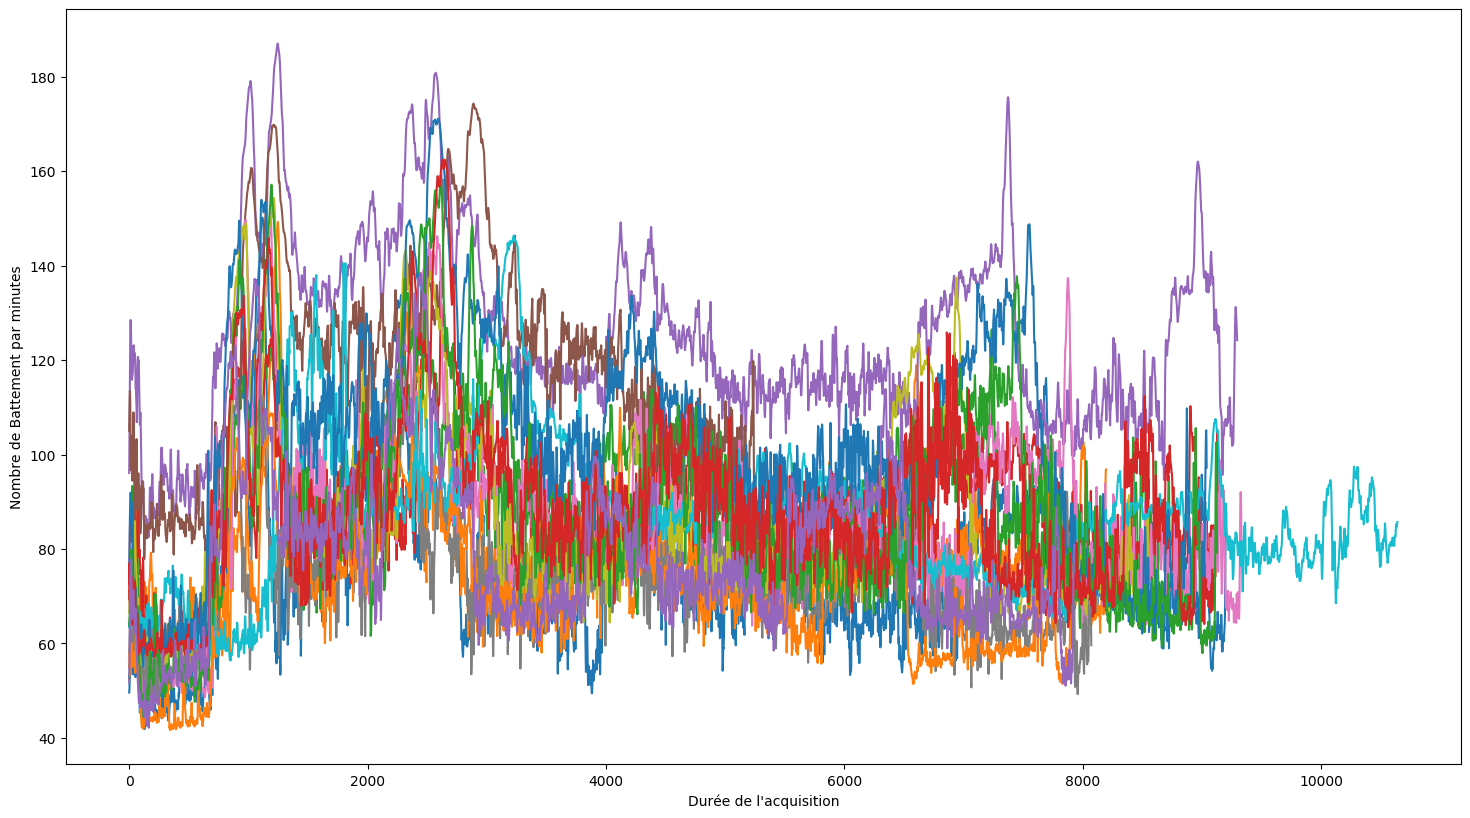

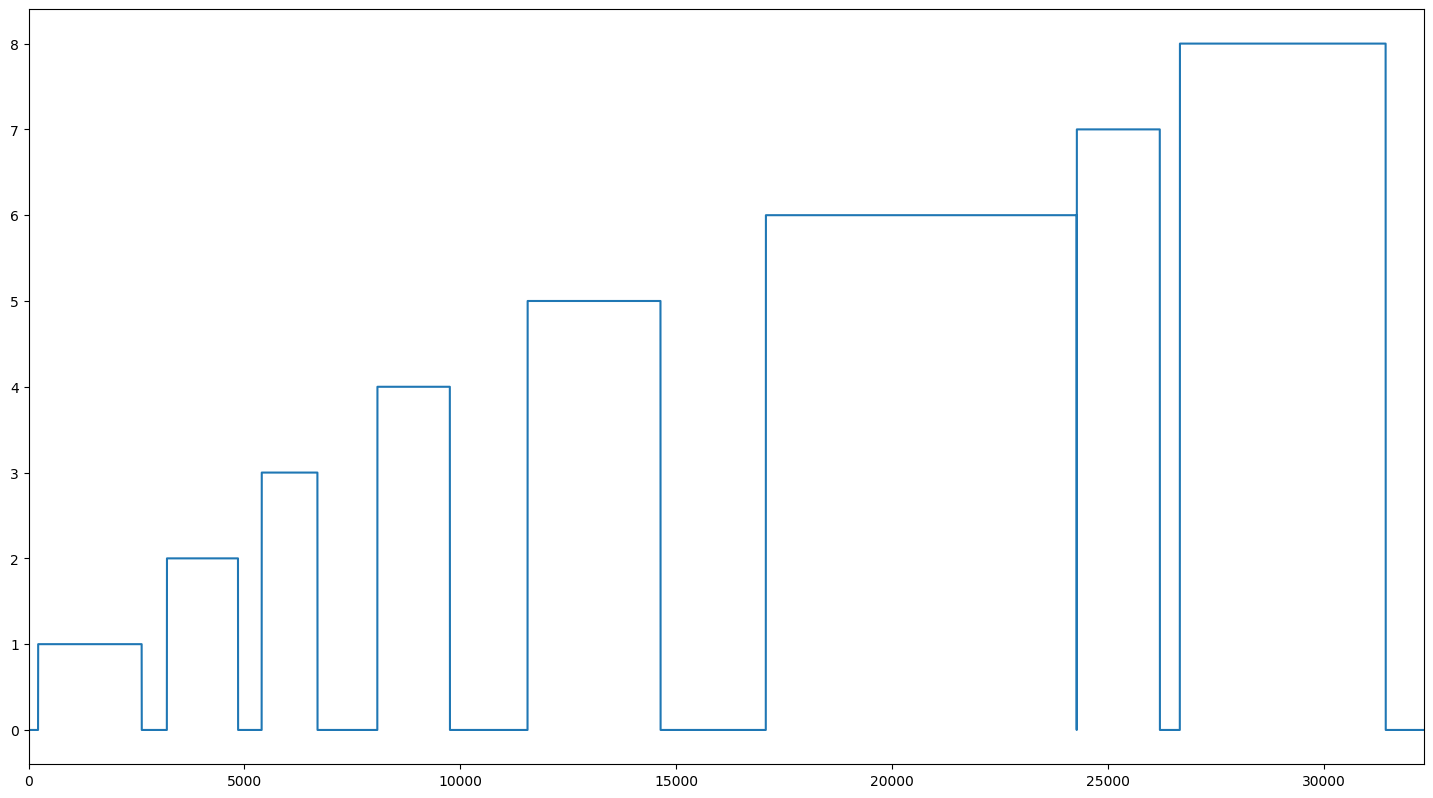

In [288]:
plt.figure(figsize=(18,10), dpi=100)
for Dict in Liste_Dict:
    t = np.arange(0,len(Dict["label"])*2,2)
    plt.plot(t,Dict["label"])   
plt.xlabel("Durée de l'acquisition")
plt.ylabel("Nombre de Battement par minutes")
plt.show()

Df_activitee = Liste_liste[7]
Df_activitee[3].columns = ["Activity"] 
plt.figure(figsize=(18,10), dpi=100)
Df_activitee[3].Activity.plot(use_index=True)

### Ces graphiques permettent de mettre en évidence la différences d'ecg des indivius en fonction des activités réalisées 

In [289]:
Activity_count = pd.DataFrame(Df_activitee[3].Activity.value_counts())
Activity_count["Percent"] = Df_activitee[3].Activity.value_counts()/len(Df_activitee[3])*100
Activity_count_rename = Activity_count.rename(index = {1.0:"Sitting",2.0:"Ascending/Descending Stairs",3.0:"Table Soccer",4.0 : "Cycling",5.0 : "Driving a car",6.0 : "Lunch break",7.0 : "Walking",8.0 : "Working",0.0 : "No Activity"})
Activity_count_rename

,Activity,Percent
No Activity,8328,25.767327
Lunch break,7200,22.277228
Working,4768,14.752475
Driving a car,3080,9.529703
Sitting,2400,7.425743
Walking,1924,5.952970
Cycling,1680,5.198020
Ascending/Descending Stairs,1648,5.099010
Table Soccer,1292,3.997525


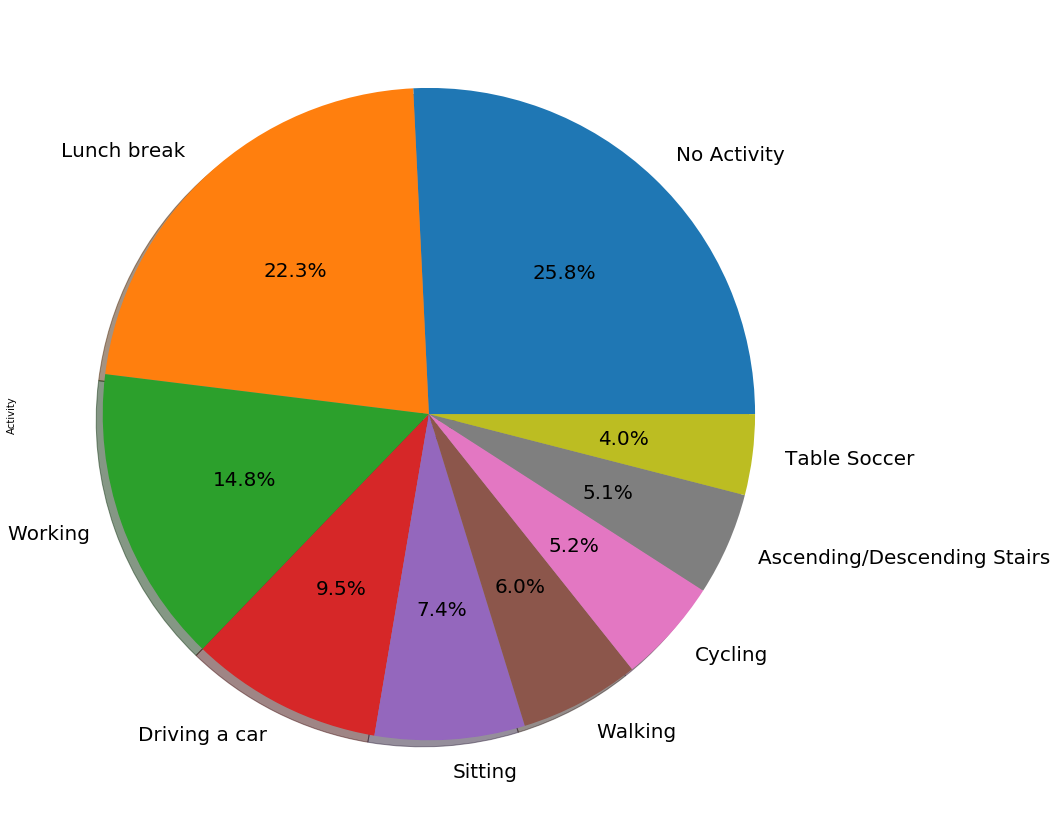

In [290]:
plot = Activity_count_rename.plot.pie(y="Activity",figsize =(15,15),shadow = True,autopct='%1.1f%%',fontsize=20,legend = False)

### Proportion de la durée de chaque activité par rapport à la durée totale de l'expérience

### Comme le but est de déterminer l'activité en fonction de paramètre, nous allons échelloner toutes les données par rapport à "activité

In [291]:
def plot_variable(variable):
    fig,(ax1) = plt.subplots(figsize = (16,8))
    ax1.set_xticklabels(Dataset_visu.Subject, rotation=80)    
    sns.barplot(x=Dataset_visu.Subject, y=variable, ax=ax1, ci=None)
   


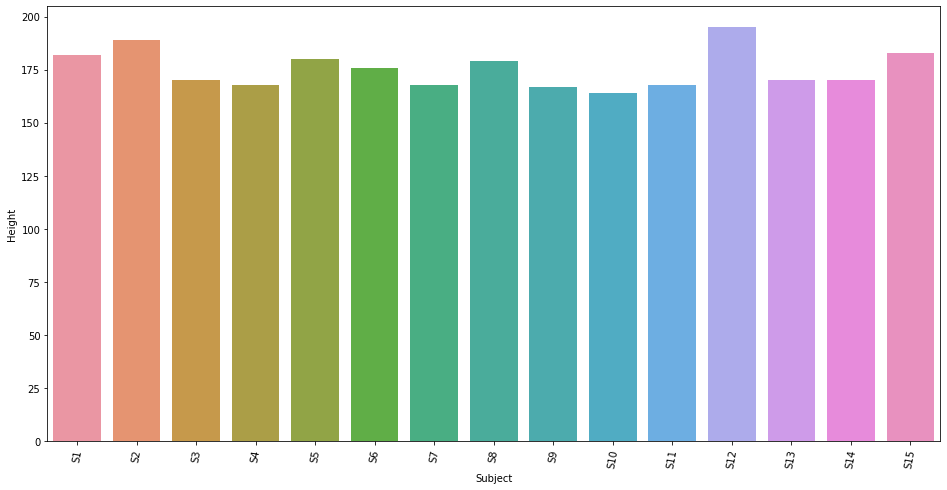

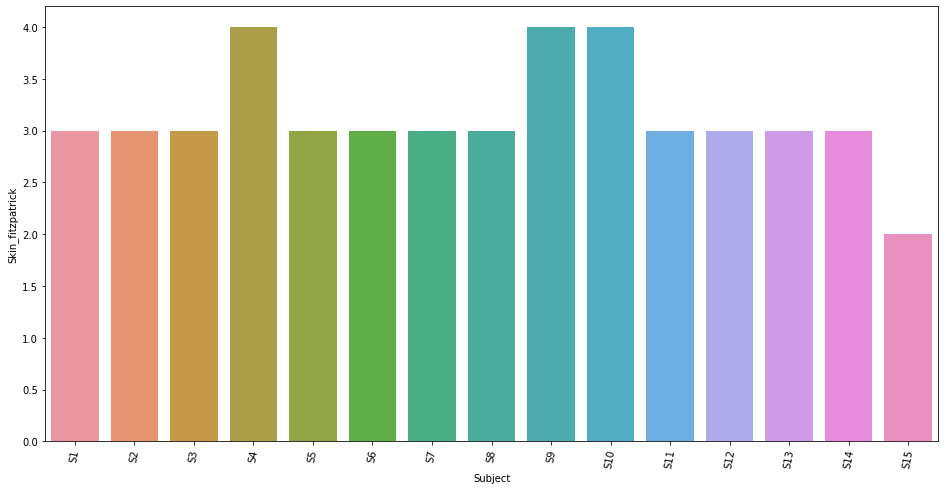

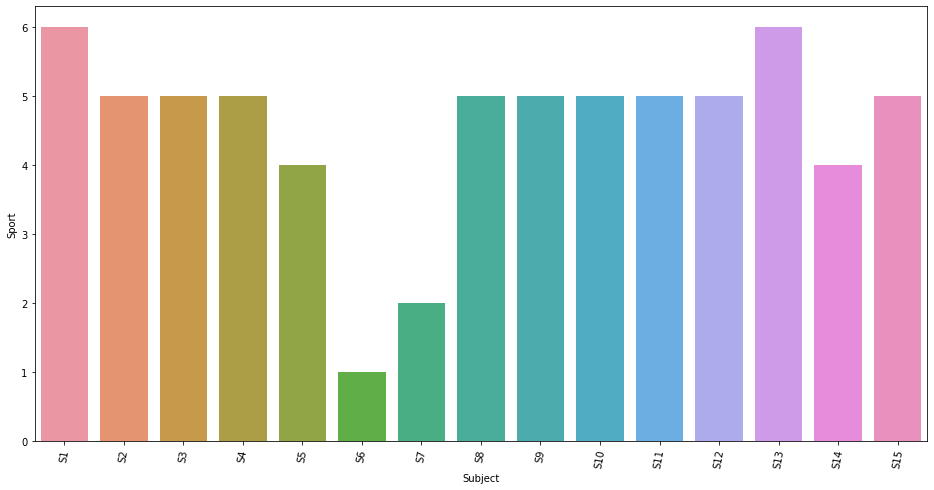

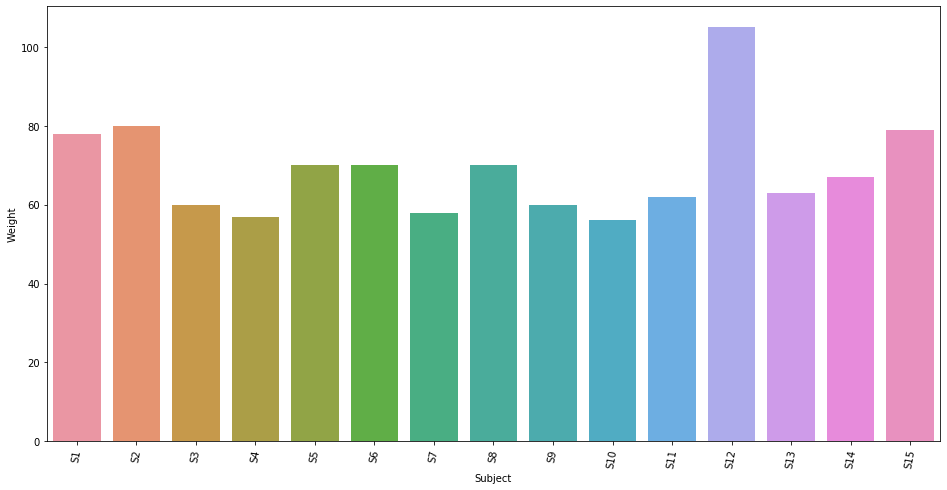

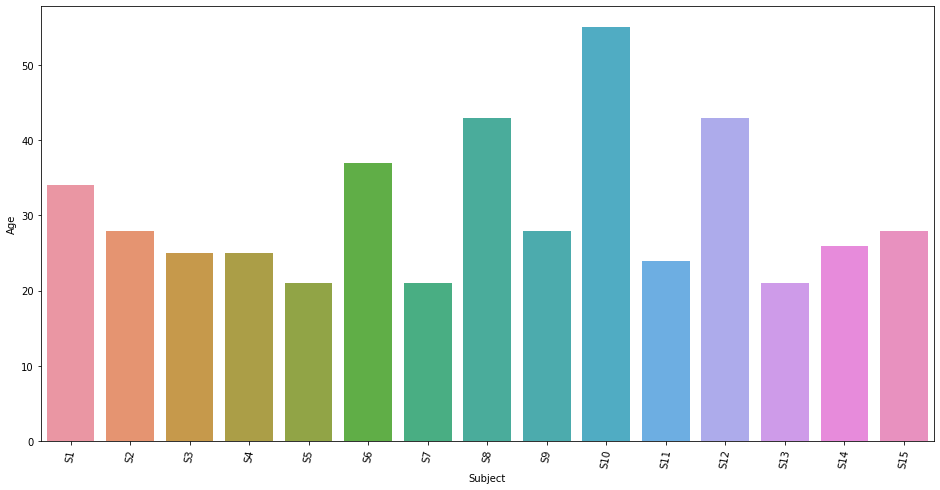

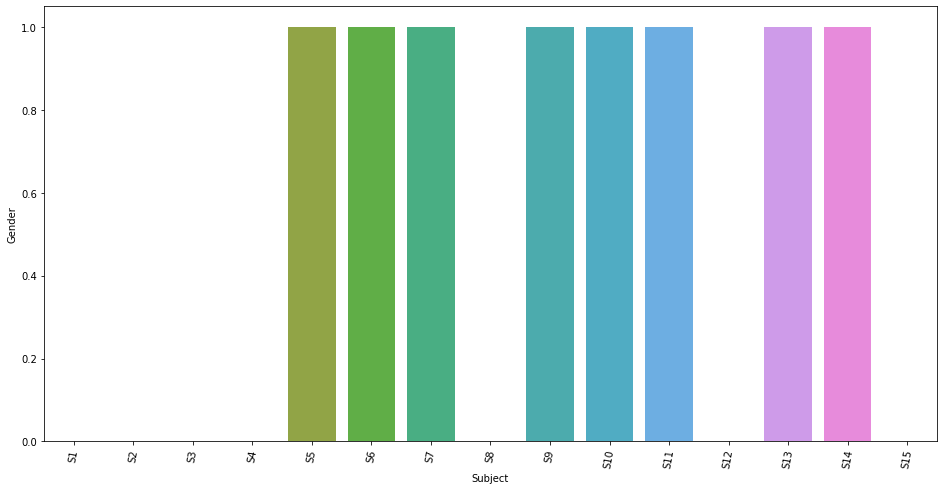

In [292]:
tab_col_infos = ["Height","Skin_fitzpatrick","Sport","Weight","Age","Gender"]
for c in tab_col_infos:
    #print(
    data = Dataset_visu[c]
    plot_variable(data)

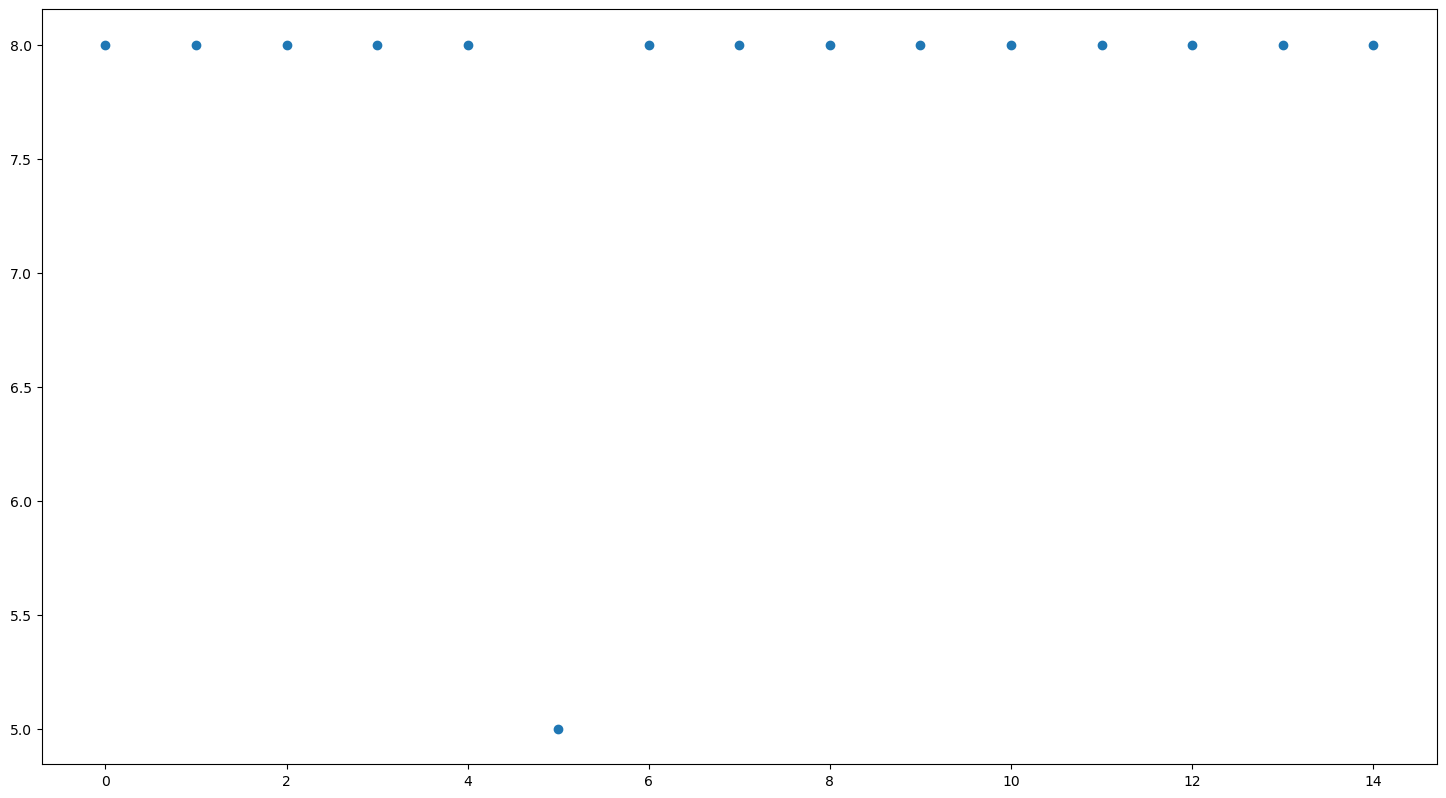

In [293]:
nbr_activity_liste = []
nbv_subject_liste = []
for l in Liste_Dict:
    nbr_activity = max(l["activity"])
    nbr_activity_liste.append(nbr_activity)
    #nbv_subject_liste.append(l[3]["Subject"])
    nbv_subject_liste.append(l["subject"])
df_subject = pd.DataFrame(nbv_subject_liste)
df_activity= pd.DataFrame(nbr_activity_liste)


plt.figure(figsize=(18,10), dpi=100)
plt.scatter(df_subject.index,df_activity[0])   

### On peut voir que S6 a moins de valeur que les autres individus ce qui corresponds aux infos du readme

In [294]:
data_subject = Dataset_visu["Subject"].unique()
num = 1.0
for data in data_subject:    
    Dataset_visu['Subject'] = [(num if val==data else val) for val in Dataset_visu['Subject']]
    num = num+1

In [295]:
Dataset_visu.dtypes

Activity            float64
Weight              float64
Gender              float64
Age                 float64
Height              float64
Skin_fitzpatrick    float64
Sport               float64
ChestAcc_X          float64
ChestAcc_Y          float64
ChestAcc_Z          float64
WristAcc_X          float64
WristAcc_Y          float64
WristAcc_Z          float64
ECG                 float64
Resp                float64
BVP                 float64
EDA                 float64
Label               float64
Subject             float64
dtype: object

In [296]:
Dataset_visu.sample(10)

,Activity,Weight,Gender,Age,Height,Skin_fitzpatrick,Sport,ChestAcc_X,ChestAcc_Y,ChestAcc_Z,WristAcc_X,WristAcc_Y,WristAcc_Z,ECG,Resp,BVP,EDA,Label,Subject
219567,6.0,58.0,1.0,21.0,168.0,3.0,2.0,0.8514,0.2542,0.1176,-0.171875,0.031250,1.000000,0.023254,1.414490,-86.03,4.733221,80.772714,7.0
167104,6.0,70.0,1.0,21.0,180.0,3.0,4.0,0.9402,-0.0866,-0.2978,-0.781250,0.359375,-0.218750,-0.082581,14.436340,66.21,9.371258,114.097027,5.0
9487,0.0,78.0,0.0,34.0,182.0,3.0,6.0,0.8370,-0.2298,-0.1826,-0.468750,0.578125,0.640625,-0.231125,-1.544189,-1.68,6.140564,87.981363,1.0
222572,6.0,58.0,1.0,21.0,168.0,3.0,2.0,0.9086,-0.0904,-0.0898,-0.625000,-0.609375,0.640625,-0.102264,-1.200867,27.96,3.807353,88.450603,7.0
252359,0.0,70.0,0.0,43.0,179.0,3.0,5.0,0.4456,-0.0424,-0.0580,-0.250000,-1.046875,0.359375,0.420593,-3.550720,12.33,6.205516,73.089557,8.0
53532,0.0,80.0,0.0,28.0,189.0,3.0,5.0,1.0030,0.1570,0.2734,-0.203125,0.859375,0.062500,-0.105515,7.997131,25.66,6.428347,82.688782,2.0
7630,0.0,78.0,0.0,34.0,182.0,3.0,6.0,0.9114,0.2366,0.1512,0.390625,0.125000,0.531250,-0.027054,-4.486084,58.10,4.667849,75.609282,1.0
17808,0.0,78.0,0.0,34.0,182.0,3.0,6.0,0.8710,-0.1090,-0.2694,-0.671875,-0.062500,0.812500,-0.248245,0.694275,158.88,6.082066,86.859003,1.0
130916,6.0,57.0,0.0,25.0,168.0,4.0,5.0,0.8672,-0.2582,-0.2668,0.515625,-0.843750,0.093750,-0.185989,-0.602722,24.59,3.140020,85.073250,4.0
281279,0.0,60.0,1.0,28.0,167.0,4.0,5.0,1.0638,0.0846,-0.2240,-0.921875,0.359375,1.031250,0.101212,-1.759338,-146.63,1.895495,113.523084,9.0


### Matrice de corrélation 

In [297]:
corrs = round(Dataset_visu.corr(),2)

In [298]:
corrs.head()

,Activity,Weight,Gender,Age,Height,Skin_fitzpatrick,Sport,ChestAcc_X,ChestAcc_Y,ChestAcc_Z,WristAcc_X,WristAcc_Y,WristAcc_Z,ECG,Resp,BVP,EDA,Label,Subject
Activity,1.00,-0.01,-0.03,-0.05,-0.01,-0.01,0.08,-0.05,-0.04,-0.13,0.02,-0.29,0.18,0.0,-0.0,0.0,-0.13,-0.15,0.00
Weight,-0.01,1.00,-0.50,0.21,0.95,-0.49,0.15,-0.13,0.14,-0.23,0.08,0.08,0.12,-0.0,-0.0,0.0,0.18,-0.20,0.08
Gender,-0.03,-0.50,1.00,-0.14,-0.60,0.25,-0.41,0.02,0.06,-0.04,-0.07,-0.06,-0.16,0.0,-0.0,-0.0,0.06,0.37,0.39
Age,-0.05,0.21,-0.14,1.00,0.12,0.32,0.13,-0.07,0.00,-0.16,-0.03,-0.00,0.01,0.0,0.0,0.0,-0.11,-0.22,0.09
Height,-0.01,0.95,-0.60,0.12,1.00,-0.54,0.13,-0.11,0.09,-0.16,0.07,0.05,0.12,-0.0,-0.0,0.0,0.22,-0.16,-0.13


In [299]:
corrs

,Activity,Weight,Gender,Age,Height,Skin_fitzpatrick,Sport,ChestAcc_X,ChestAcc_Y,ChestAcc_Z,WristAcc_X,WristAcc_Y,WristAcc_Z,ECG,Resp,BVP,EDA,Label,Subject
Activity,1.00,-0.01,-0.03,-0.05,-0.01,-0.01,0.08,-0.05,-0.04,-0.13,0.02,-0.29,0.18,0.00,-0.00,0.00,-0.13,-0.15,0.00
Weight,-0.01,1.00,-0.50,0.21,0.95,-0.49,0.15,-0.13,0.14,-0.23,0.08,0.08,0.12,-0.00,-0.00,0.00,0.18,-0.20,0.08
Gender,-0.03,-0.50,1.00,-0.14,-0.60,0.25,-0.41,0.02,0.06,-0.04,-0.07,-0.06,-0.16,0.00,-0.00,-0.00,0.06,0.37,0.39
Age,-0.05,0.21,-0.14,1.00,0.12,0.32,0.13,-0.07,0.00,-0.16,-0.03,-0.00,0.01,0.00,0.00,0.00,-0.11,-0.22,0.09
Height,-0.01,0.95,-0.60,0.12,1.00,-0.54,0.13,-0.11,0.09,-0.16,0.07,0.05,0.12,-0.00,-0.00,0.00,0.22,-0.16,-0.13
Skin_fitzpatrick,-0.01,-0.49,0.25,0.32,-0.54,1.00,0.10,0.02,-0.10,-0.00,0.02,-0.04,-0.00,-0.00,0.00,-0.00,-0.19,0.02,-0.22
Sport,0.08,0.15,-0.41,0.13,0.13,0.10,1.00,0.05,0.02,0.12,0.03,0.00,0.12,-0.00,0.00,0.00,-0.23,-0.29,0.04
ChestAcc_X,-0.05,-0.13,0.02,-0.07,-0.11,0.02,0.05,1.00,-0.02,0.25,-0.02,0.06,-0.11,0.03,-0.01,0.00,-0.03,0.08,-0.00
ChestAcc_Y,-0.04,0.14,0.06,0.00,0.09,-0.10,0.02,-0.02,1.00,-0.07,0.01,0.03,0.03,0.01,-0.00,0.00,0.16,0.00,0.21
ChestAcc_Z,-0.13,-0.23,-0.04,-0.16,-0.16,-0.00,0.12,0.25,-0.07,1.00,0.01,0.22,-0.14,0.00,-0.01,0.00,-0.09,0.29,-0.02


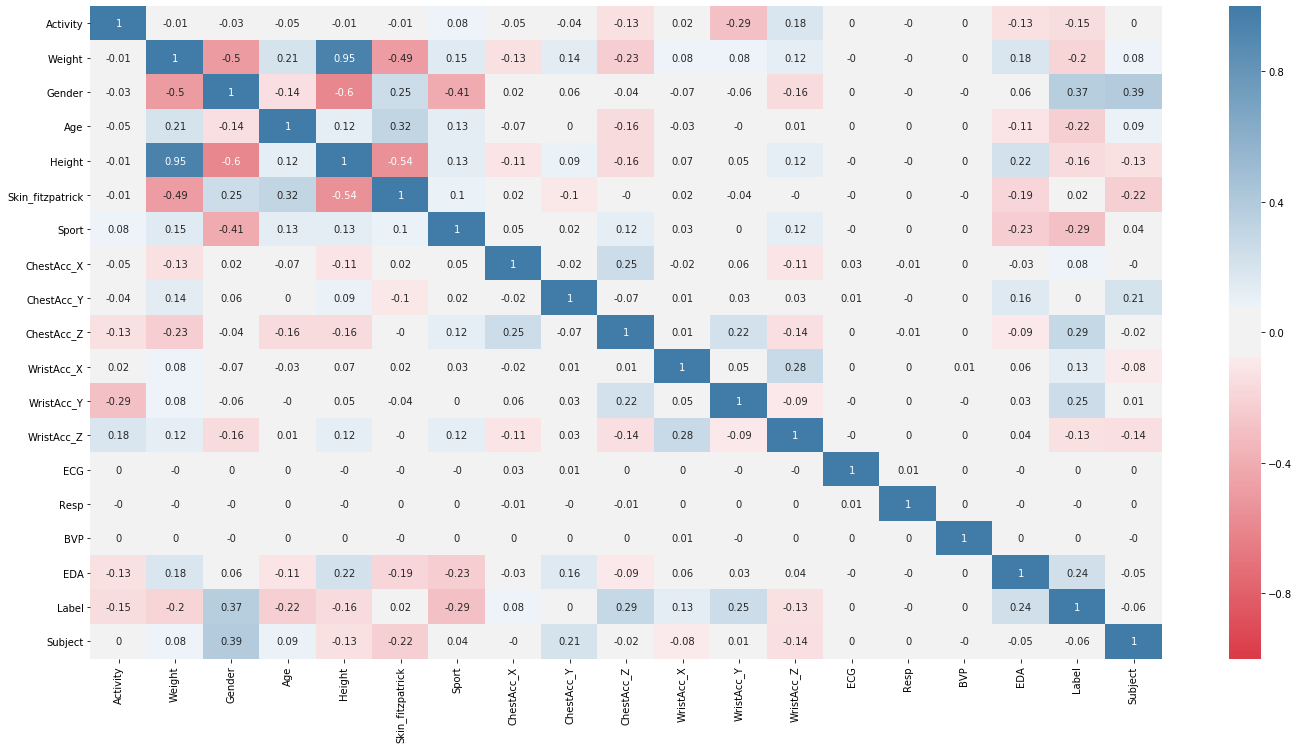

In [300]:
cols = corrs.columns[: int(len(corrs.columns))]
cmap = sns.diverging_palette(10, 240, sep=20, as_cmap=True)
plt.figure(figsize=(24, 12))
sns.heatmap(corrs, annot=True, vmin=-1.0, vmax=1.0, cmap=cmap)

# Mise en place des modèles 

In [301]:
Dataset_modele = Df_final.copy()

## Mise en forme Dataset pour être injecter dans les algorithmes

### Suppression colonnes inutiles 

In [302]:
# normalisation de Gender pour donner comme valeur 1 si la valeur est égale à" m"et 0 si la valeur est égale à " f"

In [303]:
del Dataset_modele['Subject']
Dataset_modele.dtypes

Activity            float64
Weight              float64
Gender              float64
Age                 float64
Height              float64
Skin_fitzpatrick    float64
Sport               float64
ChestAcc_X          float64
ChestAcc_Y          float64
ChestAcc_Z          float64
WristAcc_X          float64
WristAcc_Y          float64
WristAcc_Z          float64
ECG                 float64
Resp                float64
BVP                 float64
EDA                 float64
Label               float64
dtype: object

In [304]:
Dataset_modele.count()

Activity            517956
Weight              517956
Gender              517956
Age                 517956
Height              517956
Skin_fitzpatrick    517956
Sport               517956
ChestAcc_X          517956
ChestAcc_Y          517956
ChestAcc_Z          517956
WristAcc_X          517956
WristAcc_Y          517956
WristAcc_Z          517956
ECG                 517956
Resp                517956
BVP                 517956
EDA                 517956
Label               517956
dtype: int64

## Split du dataset

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier()
target = Dataset_modele.Activity
feature = Dataset_modele.drop(columns="Activity")
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, random_state=1234)

In [306]:
Dataset_modele.Activity

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
517926    0.0
517927    0.0
517928    0.0
517929    0.0
517930    0.0
517931    0.0
517932    0.0
517933    0.0
517934    0.0
517935    0.0
517936    0.0
517937    0.0
517938    0.0
517939    0.0
517940    0.0
517941    0.0
517942    0.0
517943    0.0
517944    0.0
517945    0.0
517946    0.0
517947    0.0
517948    0.0
517949    0.0
517950    0.0
517951    0.0
517952    0.0
517953    0.0
517954    0.0
517955    0.0
Name: Activity, Length: 517956, dtype: float64

In [307]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((388467, 17), (129489, 17), (388467,), (129489,))

In [308]:
[tuple_[0]/Df_final.shape[0] for tuple_ in (xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)]

[0.75, 0.25, 0.75, 0.25]

## Random Forest

In [309]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 100],
    'max_depth': [2, 4, None]
}

grid_search = GridSearchCV(rf, param_grid)

grid_search.fit(xtrain, ytrain)
grid_search.best_estimator_

C:\Users\guill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
rf = grid_search.best_estimator_
performances = []

rf.fit(xtrain, ytrain)
rf_score = rf.score(xtest, ytest)

print("Score for Random Forest:", rf_score)
performances.append(rf_score)

Score for Random Forest: 0.9513163280278634


## Score de 94% pour Rf

In [311]:
tamp = xtest.sample()
index = tamp.index
print(index[0])
print("Prédicition : "+str(rf.predict(tamp)))

Dataset_modele.iloc[index]


214049
Prédicition : [5.]


,Activity,Weight,Gender,Age,Height,Skin_fitzpatrick,Sport,ChestAcc_X,ChestAcc_Y,ChestAcc_Z,WristAcc_X,WristAcc_Y,WristAcc_Z,ECG,Resp,BVP,EDA,Label
214049,5.0,58.0,1.0,21.0,168.0,3.0,2.0,0.8066,-0.018,-0.5258,-0.59375,-0.796875,0.28125,0.23204,2.287292,-36.05,11.71976,76.901615


### Export du model pour l'utiliser avec l'API 

In [166]:
from pickle import dump

with open("Modele_rf.pickle","wb")as f:
    pickle.dump(rf,f)    

### Réseau Neuronaux

In [167]:
type(xtrain)

pandas.core.frame.DataFrame

In [168]:
x_columns = Dataset_modele.columns.drop('Activity')
x = Dataset_modele[x_columns].values
dummies = pd.get_dummies(Dataset_modele['Activity']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [170]:
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ELU, Input, Dropout

input = Input(shape=x.shape[1])

m = Dense(64)(input)
m = ELU()(m)
m = Dropout(0.33)(m)

m = Dense(64)(m)
m = ELU()(m)
m = Dropout(0.33)(m)

m = Dense(32)(m)
m = ELU()(m)
m = Dropout(0.33)(m)

m = Dense(16)(m)
m = ELU()(m)
m = Dropout(0.33)(m)

# m = Dense(1, activation='linear')(m)

output = Dense(y.shape[1], activation='softmax')(m)

model = Model(inputs=[input], outputs=[output])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
elu (ELU)                    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
elu_1 (ELU)                  (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0     

In [171]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='loss', patience=30, verbose=1, restore_best_weights=True)

rlp = ReduceLROnPlateau(monitor='loss', patience=9, verbose=1, factor=0.5, cooldown=5, min_lr=1e-10)

In [172]:
history = model.fit(x_train
                    ,y_train
#                     ,validation_data=(x_test,y_test)
                    ,callbacks=[es, rlp]
                    ,verbose=1
                    ,epochs=50
                    , batch_size=512).history

Train on 388467 samples
Epoch 1/50
388467/388467 [==============================] - 4s 10us/sample - loss: 0.4213 - acc: 0.8807
Epoch 2/50
388467/388467 [==============================] - 3s 8us/sample - loss: 0.3104 - acc: 0.8890
Epoch 3/50
388467/388467 [==============================] - 3s 7us/sample - loss: 0.2735 - acc: 0.8911
Epoch 4/50
388467/388467 [==============================] - 3s 7us/sample - loss: 0.2471 - acc: 0.8954
Epoch 5/50
388467/388467 [==============================] - 3s 8us/sample - loss: 0.2296 - acc: 0.9023
Epoch 6/50
388467/388467 [==============================] - 3s 8us/sample - loss: 0.2192 - acc: 0.9081
Epoch 7/50
388467/388467 [==============================] - 3s 7us/sample - loss: 0.2110 - acc: 0.9125
Epoch 8/50
388467/388467 [==============================] - 3s 8us/sample - loss: 0.2054 - acc: 0.9154
Epoch 9/50
388467/388467 [==============================] - 3s 9us/sample - loss: 0.2015 - acc: 0.9170
Epoch 10/50
388467/388467 [=====================

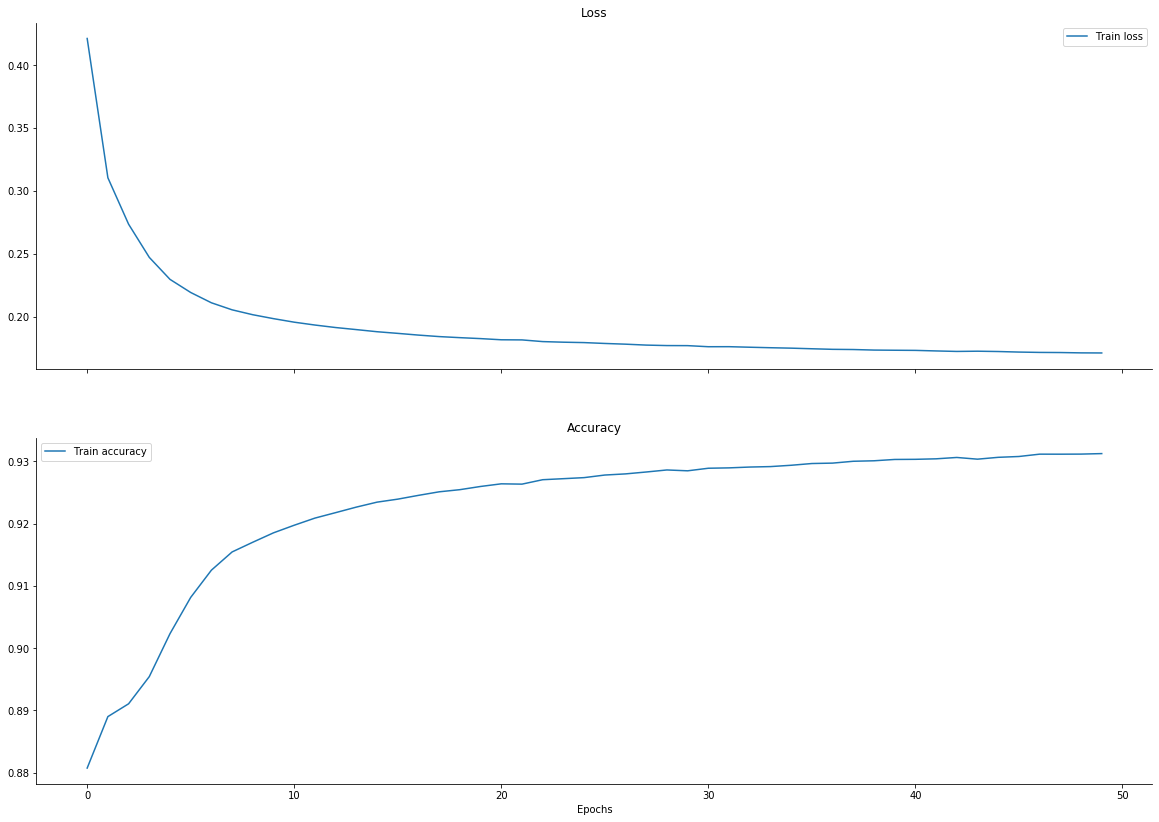

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
# ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['acc'], label='Train accuracy')
# ax2.plot(history['val_acc'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [174]:
score = model.evaluate(x_test, y_test)[1]
print(score)
performances.append(score)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.9470092


In [177]:
tamp = xtest.sample()
index = tamp.index
test = model.predict(tamp)

In [178]:
prediction = np.argmax(test)
print("Prédiction : "+str(prediction))
print("Verification : "+ str(Dataset_modele["Activity"].iloc[index]))

Prédiction : 0
Verification : 317890    0.0
Name: Activity, dtype: float64


# Prédiction de 94% Réseau neuronaux

### Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
algorithme = DecisionTreeClassifier()
algorithme.fit(x_train, y_train)
score = algorithme.score(x_test, y_test)
performances.append(score)

In [184]:
performances[0:3]

[0.9499494165527573, 0.9470092, 0.9101236398458556]

# Django API 